In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [15]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [16]:
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [17]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.05),
    RandomZoom(0.1),
    RandomContrast(0.1),
])


In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 100), (10000, 32, 32, 3), (10000, 100))

Text(0.5, 1.0, 'Label: 0.0')

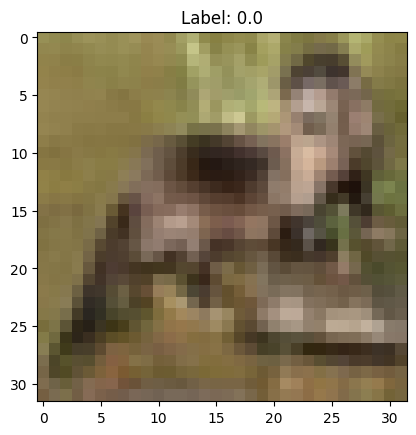

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[100])
plt.title(f"Label: {y_train[20][0]}")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization , Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    data_augmentation,
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])


In [22]:
from tensorflow.keras.metrics import TopKCategoricalAccuracy
model.compile(optimizer='adam',  # or optimizer=Adam(learning_rate=0.01) without config parameters
              loss='categorical_crossentropy',
              metrics=['accuracy', TopKCategoricalAccuracy(k=5)])


In [ ]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-5
)
early_stop = EarlyStopping(
    monitor='val_loss',   
    patience=10,          
    restore_best_weights=True  
)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop,lr_scheduler]
)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 103ms/step - accuracy: 0.0736 - loss: 4.4844 - top_k_categorical_accuracy: 0.2308 - val_accuracy: 0.2098 - val_loss: 3.3105 - val_top_k_categorical_accuracy: 0.4776 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.2074 - loss: 3.2706 - top_k_categorical_accuracy: 0.4905 - val_accuracy: 0.2878 - val_loss: 2.8330 - val_top_k_categorical_accuracy: 0.5973 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.2888 - loss: 2.8342 - top_k_categorical_accuracy: 0.5997 - val_accuracy: 0.3634 - val_loss: 2.4756 - val_top_k_categorical_accuracy: 0.6736 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 108ms/step - accuracy: 0.3379 - loss: 2.6012 - top_k_categorical_accuracy: 0.6501 - val_accuracy: 0.3856 - val_loss: 2.3642 - val_top_k_categorical_accuracy: 0.6988 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 108ms/step - accura

KeyboardInterrupt: 

In [2]:
model.summary()

NameError: name 'model' is not defined

In [26]:
results = model.evaluate(x_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
print("Test top-5 accuracy:", results[2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6516 - loss: 1.2594 - top_k_categorical_accuracy: 0.8879
Test loss: 1.2397369146347046
Test accuracy: 0.6550999879837036
Test top-5 accuracy: 0.8902000188827515


In [1]:
model.save("cifar_100_scratch.h5")

NameError: name 'model' is not defined